## 2. Machine Learning for Regression


In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [2]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
# !wget $data 

--2021-09-15 10:02:55--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2021-09-15 10:02:55 (36.1 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Making the columns uniform in terms of capitalisation and having no spaces in the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
# We're doing the same for the 'make' column of the dataset 
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [5]:
# Finding categorical variables so that we can standardise the inputs. 
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
# Standardising the inputs 
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
# There are a few datatypes here, let's count how many of each datatype there is here! 
df.dtypes.value_counts()

object     8
int64      5
float64    3
dtype: int64

## 2.3 Exploratory data analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Distribution of price

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

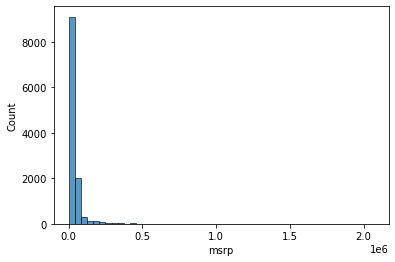

In [12]:
# Visualisation of MSRP 
sns.histplot(df.msrp, bins=50)

There are definitely some outliers out there in the visualisation, if not we will be looking at a smaller scale. Let's delve further! 

<AxesSubplot:xlabel='msrp', ylabel='Count'>

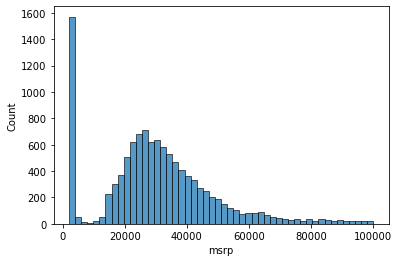

In [13]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [14]:
# Transformation of certain numbers using log(1+x)
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [15]:
# This is the same as using log1p, except that we are manually adding the one 1 before applying logarithms on it.
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [16]:
# Transformation of the MSRPs
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

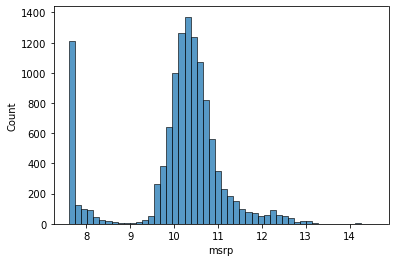

In [17]:
# Look at the scale - it has drastically reduced! This is especially wonderful for linear regression since linear regression is rather sensitive to differences :)
sns.histplot(price_logs, bins=50)

Missing values

In [18]:
# Okay, let's take a look at the dataset and see if there are any missing values! 
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

In [19]:
# Splitting of dataset into the train, validation, and the test dataset 
n = len(df)

# Validation dataset
n_val = int(n * 0.2)

# Test dataset 
n_test = int(n * 0.2)

# Train dataset
n_train = n - n_val - n_test

In [20]:
n

11914

In [21]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [22]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [23]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [24]:
# Gives an array from 0 to the specified number itself. This will help in what we're trying to do.
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [25]:
# We're shuffling the indexes so that we are able to get random datapoints out of the dataset 
# This is so that we are able to reduce any bias by any previous points
np.random.seed(2)
np.random.shuffle(idx)

In [26]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [27]:
# To visualise above, this is what's above:
idx[:n_train]

array([2735, 6720, 5878, ..., 9334, 5284, 2420])

In [28]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [29]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [30]:
# As seen above, the index of the train data is mixed up, so let's reset the index back to 0 - 7150.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
# Transformation of the y values
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [32]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [33]:
len(y_train)

7150

## 2.5 Linear regression

In [34]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

Recall that using the feature matrix (xi), we put it into a model and produce yi. 

In other words, 

g(xi) = yi

In [35]:
# From index number 10: We choose engine_hp, city_mpg and popularity 
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

# How did you get the initial bias values and the weights? 

For this specific example: 

# g(xi) = W0 + W1 * X1 + W2 * X2 + W3 * X3

whereby X is the value of the feature
whereby W is the weight/bias of the feature.

W0 is the bias term itself without knowing anything about the car. 

W1 * X1 + W2 * X2 + W3 * X3 is basically a summation/sigma (refer to the video to see how the summation looks like)

Therefore, mathematically, it can be simplified to 
# g(xi) = W0 + summation(1,3) (w[j] * xi[j])  
If we use python, we have to start from 0 instead, therefore 
# g(xi) = W0 + summation(0,2) (w[j] * xi[j])

Do note that the parameters for the summation are the lower and upper limits.

In [36]:
# Python code for how the linear regression works, but in a more general sense 
def linear_regression(xi):
    # number of features in the feature matrix
    n = len(xi)
    
    # We have an initial bias term W0, so that is the starting of our prediction.
    pred = w0
    
    # Recursive feature whereby the feature + the weight/bias is being added.
    # Range(n) starts at 0 and ends at n-1 by default
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    # End product 
    return pred

In [37]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [38]:
linear_regression(xi)

12.312

In [39]:
# Since we did log1p just now, we have to reverse it so we do a exponential first and then we minus 1.
np.expm1(12.312)

222347.2221101062

In [40]:
# Let's double check the value! 
np.log1p(222347.2221101062)

12.312

## 2.6 Linear regression vector form
The general formula, as mentioned above, is: 
# g(xi) = W0 + summation(1,n) (w[j] * xi[j]) 

However, it can be written as another form. Specifically if we look at (w[j] * xi[j]),
# g(xi) = w0 + xi^T * W 

whereby xi^T is the transpose of xi. 

Why is this so? 
- Recall that both the weights and feature matrices are vectors, with size (n,1) whereby n is the number of features.
- Since the number of weights = number of features, they both have the same size.
- However, in order for vector-vector multiplication to occur, the **first vector** needs to have the **same number of columns** as the **number of rows of the second vector**. 
- We can either transpose the weights or we can transpose the feature matrix. 
- In this case, we transpose xi so that we are able to get a matrix with size (1,n).
- Since we want to get the inner product, we will use xi^T * W so we get a product of (1,1) aka the prediction (instead of W * Xi ^T)
- Finally, the vector-vector multiplication occurs, and we get the 'prediction'. 

(Note: We can transpose either vector, but since we're going with the transpose of xi, we have to make sure that we change the position of the matrices as the position affects the product of matrix-matrix multiplication, or in this case, vector-vector multiplication.) 

In [41]:
# Do note that this dot product only starts from weight 1 and feature 1. We have to consider w0, which will be covered.
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [42]:
# Inclusion of weight 0 
def linear_regression(xi):
    return w0 + dot(xi, w)

In [43]:
# w is a list in this case, we can join two lists together to get the full matrix. 
w_new = [w0] + w

In [44]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [45]:
# Why do we add [1] here? It is to consider w0. 
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [46]:
linear_regression(xi)

12.312

In [47]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [48]:
# We always have 1s in the beginning because of w0.
# If we do 0 instead, it means that there will be no w0 when we do the multiplication, which makes it incorrect.
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X


array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
def linear_regression(X):
    return X.dot(w_new)

# Why is this possible?
# This is because X is a matrix with size (3,4) while w_new is a matrix with size (4,1)
# This produces the results in a matrix with size (3,1) from vector multiplication.

In [50]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [51]:
def train_linear_regression(X, y):
    pass

Recall that:
# g(X) = X * w = y

If we want to find out the vector w (aka the weights), we can do so by adding an inverse of X to both Xw and y, so that we can find w. 

However, that's not necessarily possible as X might not have an inverse due to it being rectangular in shape. What we can do, however, is to multiply the transpose of X for both sides, therefore creating:
# X^T * X * w = X^T * y 

X^T * X is also known as a gram matrix with size (n+1, n+1), therefore allowing for an inverse and allowing us to find w as shown below: 

# (X^T * X)^-1 * X^T * X * w = (X^T * X)^-1 * X^T * y 
which is then simplified to 
# I * w =  (X^T * X)^-1 * X^T * y 

and I * w is w. 

Do note that w is not the exact solution, but rather the closest solution.


In [52]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [53]:
# Why do we need this? This is for the initial bias term. 
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
# Joining of the two matrices together to ensure there is an inclusion of the initial bias term 
# X = np.column_stack([ones, X])
# X

In [55]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [56]:
# Finding of the weights 
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [57]:
w0 = w_full[0]
w = w_full[1:]

In [58]:
w0, w

(26.0841949768029, array([286.12285934,   3.93813107]))

In [59]:
# Note: We should be using the X without the ones for the linear regression so that the ones will not stack.
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [60]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [61]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

# fill_mode = lambda col: col.fillna(col.mode())
# X_train = df_train.apply(fill_mode, axis=0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [ ]:
wo

<AxesSubplot:ylabel='Count'>

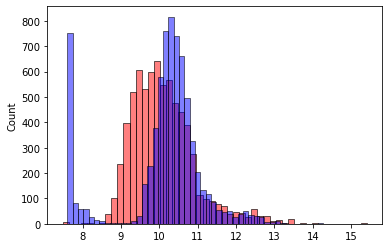

In [65]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.9 RMSE
RMSE is defined as Root Mean Squared Error.

To take this step by step:
1. Find the squared error, aka the square of error between the actual value of y and the predicted values of y.
2. The mean squared error the mean of the squared errors themselves.
3. Lastly, root means to square root the MSE. 

In [68]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [69]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Validating the model

In [70]:
# This is the same code as the steps taken in 2.8, but applied to X_train and X_val. 
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.761653099130156

## 2.11 Simple feature engineering

In [72]:
df['year'].max()

2017

In [73]:
# We're simply just adding an 'age' category
# As seen above, the max year = 2017, therefore we are able to use '2017' and then derive the age from there.
def prepare_X(df):
    # We use a copy so as to prevent any changes for the old dataframe 
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [74]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058299

Comparing with 2.10 and 2.11, we can tell that there is a slight change to the RMSE itself - 0.76165 vs 0.51721.
You can tell that there also is a difference between the previous histogram and the histogram below. 


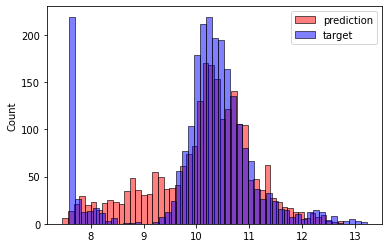

In [75]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

In [76]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [77]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    # Refer to footnote 1
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)
        
    # Refer to footnote 2 
    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [78]:
# Footnote 2: What's really going on in this for loop? It seems rather confusing. Let's try to dissect it.
test = categorical.items()
print(test)
print('\n')
# items() allow a dictionary to be converted into a 2-dimensional list

for name, values in categorical.items():
    print(name)
    print(values)
# the first element in the list is the name of the column itself, while the second element are the values themselves
# therefore, we need a second for loop for the list itself to extract the different values 
# 

dict_items([('make', ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']), ('model', ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma']), ('engine_fuel_type', ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']), ('driven_wheels', ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']), ('market_category', ['crossover', 'flex_fuel', 'luxury', 'hatchback', 'luxury,performance']), ('vehicle_size', ['compact', 'midsize', 'large']), ('vehicle_style', ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'])])


make
['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']
model
['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma']
engine_fuel_type
['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']
driven_wheels
['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']
mark

In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

52.43997510237891

In [80]:
w0, w

(-1140836584489243.2,
 array([ 1.47227861e-01, -7.62674385e+00,  5.22801945e-01,  2.22943217e+00,
        -1.48954711e-03,  8.25854734e-01,  3.34489377e+03,  3.37499633e+03,
         3.34295246e+03, -5.26211899e+00, -7.00041849e-02,  8.11222539e+00,
         2.83170539e+01, -2.43469056e+00, -5.30933332e+00, -4.15696000e+01,
        -9.53733488e+00, -5.43917524e+00, -2.04622239e+02,  1.28819567e+02,
         1.26400304e+02,  1.38282309e+02,  1.18291972e+02,  1.16041717e+02,
         1.14083658e+15,  1.14083658e+15,  1.14083658e+15,  1.14083658e+15,
         9.61059811e-01, -4.24899350e+00,  2.14325843e+00,  2.45246098e+01,
         5.66683406e+00,  1.22759762e+02,  9.56166622e+01,  1.35286208e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

## 2.13 Regularization

In [81]:
# Assume we have a matrix X with two columns of the same values.

X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]
X = np.array(X)
X

# IF we have two columns with the same values, the gram matrix cannot be inversed as shown below.
# This is known as a singular matrix, which is a matrix containing the same rows and/or columns.
# Singular matrices are not inversible.

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [82]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [83]:
# Let's test if this is inversible or not!
try:
    print(np.linalg.inv(XTX))
except np.linalg.LinAlgError:
    print('Singular matrix, can\'t be inversed')

Singular matrix, can't be inversed


This is a problem as the gram matrix NEEDS to be inversed so that we can find the weights vector.

In [84]:
# Sometimes, there is noise in the dataset itself like in the last element of the last row. 
# In the original notebook, it is 5.00000001, but I still got a LinAlgError so I decided to make it a little noisier.
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [85]:
y= [1, 2, 3, 1, 2, 3]

In [86]:
# In this case, we can see that the matrix is now different and that there there are no columns with the same values.
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [87]:
# Let's test if this is inversible or not!
try:
    print(np.linalg.inv(XTX))
except np.linalg.LinAlgError:
    print('Singular matrix, can\'t be inversed')

[[ 3.92646538e-02 -1.54615164e+05  1.54615121e+05]
 [-1.54615170e+05  3.51843724e+13 -3.51843721e+13]
 [ 1.54615129e+05 -3.51843721e+13  3.51843718e+13]]


In [88]:
# Storing the XTX inverse as a variable.
XTX_inv = np.linalg.inv(XTX)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

However, even though there is an inverse, we can tell that the inverse has very, very big numbers which is a problem. It directly affects the weights matrix.

In [89]:
# Finding the weights of the metric
XTX_inv.dot(X.T).dot(y)

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

What we can do is that we can use regularization, which is adding a small number to the diagonal of our matrix. This allows us to counteract the big numbers itself instead. We have an example like that below. 

In [90]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [91]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [92]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1],
    [2, 1, 1.0001]
]

XTX = np.array(XTX)

In [93]:
np.linalg.inv(XTX)

array([[-3.33366669e-01,  3.33350001e-01,  3.33350001e-01],
       [ 3.33350001e-01,  4.99991665e+03, -5.00008335e+03],
       [ 3.33350001e-01, -5.00008335e+03,  4.99991665e+03]])

We can tell that there is a very big difference in the 2 by 2 sub matrix at the bottom right corner itself. This shows the effect of regularization itself and how useful it is! 

You might be wondering how to implement regularization in the model itself - here's how! 

In [94]:
# Recall np.eye gives you an identity  matrix with the size n x n with the right parameters
XTX = XTX + 0.01 * np.eye(3)

In [95]:
np.linalg.inv(XTX)

array([[ -0.33672284,   0.33503094,   0.33503094],
       [  0.33503094,  49.42034681, -49.58955418],
       [  0.33503094, -49.58955418,  49.42034681]])

In [96]:
# Let's implement the regularization into our linear regression
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [97]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286390257

We can tell that there is an even further decrease in the RMSE as compared to the previous RMSE, which is great! 

## 2.14 Tuning the model

In [98]:
# We're tuning the model with regularization, using 7 different values of r.
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -1140836584489243.2 52.43997510237891
1e-05 7.545094200274929 0.4608152931021342
0.0001 7.130446807785097 0.4608153656399985
0.001 7.130870325439462 0.4608158583496996
0.1 7.000232427854901 0.4608736549066824
1 6.250747847499822 0.46158128382730246
10 4.729512585683397 0.4726098772670107


We can tell that 0.00001 has the lowest RMSE, followed by 0.0001, and lastly 0.001. Honestly, we can use either of the regularization values since the RMSE score has been about the same. In the example below, we use r = 0.001. 

In [99]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4608158583496996

## 2.15 Using the model

In [100]:
# Recall that for the Model Selection process, we combine train data and val data after using val data.
df_full_train = pd.concat([df_train, df_val])

In [101]:
df_full_train = df_full_train.reset_index(drop=True)

In [102]:
X_full_train = prepare_X(df_full_train)

In [103]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [104]:
# We have to do that for y too.
y_full_train = np.concatenate([y_train, y_val])

In [105]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [106]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.46007539702898376

In [107]:
# Using the model for one entry
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [108]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [109]:
X_small = prepare_X(df_small)

In [110]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.632492515554878

In [111]:
prediction = np.expm1(y_pred)

In [112]:
test = np.expm1(y_test[20])

In [113]:
print('RMSE: ' + str((prediction - test)** 0.5))

RMSE: 80.37000095271486


## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability